In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

GlobalCases=pd.read_csv('time_series_covid19_confirmed_global.csv')
GlobalDeaths=pd.read_csv('time_series_covid19_deaths_global.csv')

USCases=pd.read_csv('time_series_covid19_confirmed_US.csv')
USDeaths=pd.read_csv('time_series_covid19_deaths_US.csv')

In [12]:
def get_cases(country="global",province=None, county=None ):
    """"
    gets an np.array of the number of total cases in a certain county/province/country per day
    
    country, the country whose cases we want to get
    
    province, the province whose cases we want to get, if this is None, then a sum of all of the cases in a country
    
    county (US only), the county whose cases we want to get, if this is None then sum all of the cases in the province
    """
    #if country = US
    if country == 'US':
        #dataframe=copy(USCases)
        dataframe=USCases.copy(deep=True)
        #if province != None
        if province !=None:
            #dataframe=get all rows where dataframe['Province_State']==province
            dataframe=dataframe[dataframe['Province_State']==province]
            #if county != None
            if county != None:
                #dataframe=all rows where dataframe['Admin2']==county
                dataframe==dataframe[dataframe['Admin2'==county]]
        CaseArray=np.array(dataframe[dataframe.columns[12:]]).sum(axis=0)
    elif country=="global":
        CaseArray=np.array(USCases[USCases.columns[12:]]).sum(axis=0)+\
            np.array(GlobalCases[GlobalCases.columns[5:]]).sum(axis=0)
    #else
    else:
        
        dataframe=GlobalCases.copy(deep=True)
        dataframe=dataframe[dataframe['Country/Region']==country]
        if province!= None:
            dataframe=dataframe[dataframe["Province/State"]==province]
        CaseArray=np.array(dataframe[dataframe.columns[4:]]).np.sum(axis=0)
    return CaseArray

In [ ]:
def get_deaths(country="global",province=None, county=None ):
    """"
    gets an np.array of the number of total deaths in a certain county/province/country every day day
    
    country, the country whose deaths we want to get
    
    province, the province whose deaths we want to get, if this is None, then a sum of all of the deaths in a country
    
    county (US only), the county whose deaths we want to get, if this is None then sum all of the deaths in the province
    """
    #if country = US
    if country == 'US':
        #dataframe=copy(USDeaths)
        dataframe=USDeaths.copy(deep=True)
        #if province != None
        if province !=None:
            #dataframe=get all rows where dataframe['Province_State']==province
            dataframe=dataframe[dataframe['Province_State']==province]
            #if county != None
            if county != None:
                #dataframe=all rows where dataframe['Admin2']==county
                dataframe==dataframe[dataframe['Admin2'==county]]
        CaseArray=np.array(dataframe[dataframe.columns[12:]]).np.sum(axis=0)
    #elif if country = global
    elif country=="global":
        CaseArray=(np.array(USDeaths[UScases.columns[12:]])+\
            np.array(GlobalDeaths[GlobalCases.columns[5:]])).sum(axis=0)
    #else
    else:
        
        dataframe=GlobalDeaths.copy(deep=True)
        dataframe=dataframe[dataframe['Country/Region']==country]
        if province!= None:
            dataframe=dataframe[dataframe["Province/State"]==province]
        CaseArray=np.array(dataframe[dataframe.columns[4:]]).np.sum(axis=0)
    return CaseArray

In [4]:
def make_ticks(start_date=None,end_date=None,n_days=None, step=30):
    """
    returns the locations and date labels of the X-ticks, these ticks are sepperated by step days
    
    of the first three parameters, two are required
    """
    if start_date!=None:
        StartTimeDate=datetime.strptime(start_date, '%m/%d/%y')
    if end_date!=None:
        EndTimeDate=datetime.strptime(start_date, '%m/%d/%y')
    try:
        StartTimeDate=EndTimeDate-timedelta(days=n_days)
    #if end_date==None then NameError would be raised
    except NameError:
        EndTimeDate=StartTimeDate+timedelta(days=n_days)
    
    ticks=np.array([])
    dates=np.array([])
    n=0
    CurrentDateTime=StartTimeDate
    while CurrentDateTime <EndTimeDate:
        ticks=np.append(ticks,n)
        dates=np.append(dates,CurrentDateTime.strftime('%m/%d/%y'))
        CurrentDateTime+=timedelta(days=step)
        n+=step
    return ticks,dates

In [21]:
def simple_plot(data,title, y_label, start_date='1/23/20',events={}, log=False):
    """
    plots out data with title tile and y label y_label
    
    events is a dict of important events
    event_name:date
    """
    fig=plt.figure()
    
    
    plt.plot(data,c='b')
    x,ticks=make_ticks(start_date='1/23/20',n_days=data.shape[0])
    plt.xticks(x,ticks)
    
    fig.suptitle(title)
    
    plt.plot(data)
    
    plt.ylabel(y_label)
    
    StartDateTime=datetime.strptime(start_date, '%m/%d/%y')
    for event in events.keys():
        DateTime=datetime.strptime(events[event], '%m/%d/%y')
        plt.axvline((DateTime-StartDateTime).days,label=event)
    if events!={}:
        plt.legend()
    if log!=False:
        plt.yscale('log')

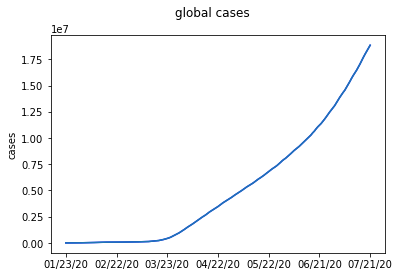

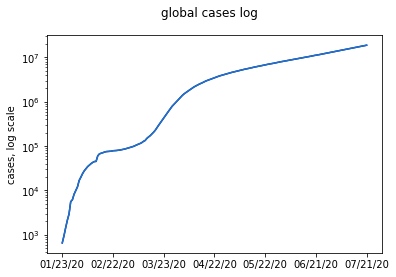

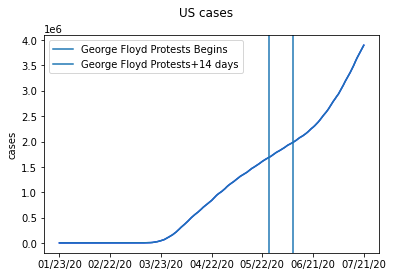

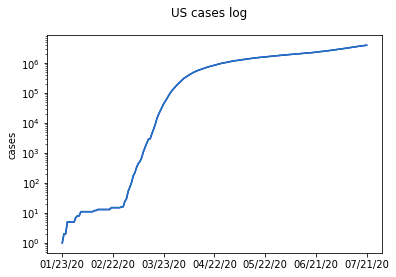

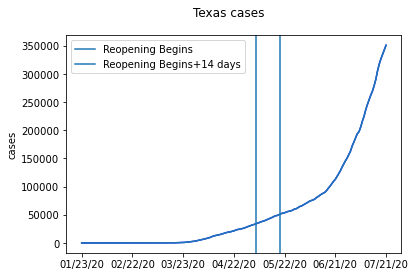

In [24]:
if __name__=="__main__":
    
    globalcases=get_cases()
    simple_plot(globalcases,"global cases","cases",log=False)
    simple_plot(globalcases,"global cases log","cases, log scale",log=True)
    
    AmericaCases=get_cases('US')
    simple_plot(AmericaCases,"US cases","cases",log=False,
               events={"George Floyd Protests Begins":"5/26/20",
                      "George Floyd Protests+14 days":"6/9/20"})
    simple_plot(AmericaCases,"US cases log","cases",log=True)
    
    TexasCases=get_cases(country='US',province='Texas')
    simple_plot(TexasCases,"Texas cases","cases",events={
        "Reopening Begins":"5/5/20",
        "Reopening Begins+14 days":"5/19/20"
    })